# Import Libraries

In [1]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D
from keras.layers.convolutional import Convolution2D, Conv2D
from keras.layers.pooling       import MaxPooling2D

Using TensorFlow backend.


In [2]:
EPOCH = 5

In [3]:
def plot_mse(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.show()

In [4]:
lines = []
#with open('../data/driving_log.csv') as csvfile:
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
lines = lines[1:]

In [5]:
print("We have {} images for training".format(len(lines)))

We have 8036 images for training


In [6]:
lines[0]

['IMG/center_2016_12_01_13_30_48_287.jpg',
 ' IMG/left_2016_12_01_13_30_48_287.jpg',
 ' IMG/right_2016_12_01_13_30_48_287.jpg',
 ' 0',
 ' 0',
 ' 0',
 ' 22.14829']

In [7]:
if 1:
    images = []
    measurements = []
    for line in lines:
        source_path = line[0]
        filename = source_path.split('/')[-1]
        #current_path = '../data/IMG' + filename
        current_path = 'data/IMG/' + filename

        image = cv2.imread(current_path)
        images.append(image)

        measurement = float(line[3])
        measurements.append(measurement)

In [8]:
print("We have {} images for training".format(len(images)))

We have 8036 images for training


In [23]:
correction = 0.2
add_left   = 0
add_right  = 0

images = []
measurements = []
path = "D:/GitHub/Behavioral-Cloning/" + 'data/IMG/'
for line in lines:
    path_c = path + line[0].split('/')[-1]
    steering_c = float(line[3])
    image_c = cv2.imread(path_c)
    images.append(image_c)
    measurements.append(steering_c)
    
    if add_left:
        path_l = path + line[1].split('/')[-1]
        steering_l = steering_c + correction
        image_l = cv2.imread(path_l)
        images.append(image_l)
        measurements.append(steering_l)
    if add_right:
        path_r = path + line[2].split('/')[-1]
        steering_r = steering_c - correction
        image_r = cv2.imread(path_r)
        images.append(image_r)
        measurements.append(steering_r)

In [24]:
print("We have {} images for training".format(len(images)))

We have 8036 images for training


# Augmenting the Data by flipping horizontally

In [11]:
augmented_images, augmented_measurments = [], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_images.append(cv2.flip(image,1))
    
    augmented_measurments.append(measurement)
    augmented_measurments.append(measurement*-1.0)

In [12]:
print("We have {} images for training".format(len(augmented_images)))

We have 16072 images for training


In [13]:
add_flip = 1
if add_flip:
    X_train = np.array(augmented_images)
    y_train = np.array(augmented_measurments)
else: 
    X_train = np.array(images)
    y_train = np.array(measurements)

In [14]:
X_train.shape, y_train.shape

((16072, 160, 320, 3), (16072,))

## Fifth Version of the Model

C:\Users\peter.forez\.conda\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
  """
C:\Users\peter.forez\.conda\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
  
C:\Users\peter.forez\.conda\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 37, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 35, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 33, 64)         36928     
__________

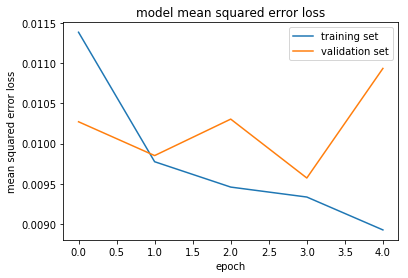

In [15]:
if 1:
    model = Sequential()
    model.add(Lambda(lambda x : x / 255.0 - 0.5, input_shape = (160,320,3)))
    model.add(Cropping2D(cropping = ((70, 25), (0,0) )))
    model.add(Conv2D(24,(5,5), subsample = (2,2), activation = 'relu'))
    model.add(Conv2D(36,(5,5), subsample = (2,2), activation = 'relu'))
    model.add(Conv2D(48,(5,5), subsample = (2,2), activation = 'relu'))
    model.add(Conv2D(64,(3,3), activation = 'relu'))
    model.add(Conv2D(64,(3,3), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dense(10))
    model.add(Dense(1))
    model.compile(loss = 'mse', optimizer = 'adam')
    model.summary()
    
    history = model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, epochs = EPOCH)#The `nb_epoch` argument in `fit` has been renamed `epochs`.
    model.save('model.h5')
    model_5 = model
    plot_mse(history)

In [16]:
model = model_5
model.summary()
from keras.utils import plot_model #pip install pydot
plot_model(model, to_file='model.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 37, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 35, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 33, 64)         36928     
__________

## Fourth Version of the Model

In [18]:
if 0:
    model = Sequential()
    model.add(Lambda(lambda x : x / 255.0 - 0.5, input_shape = (160,320,3)))
    model.add(Cropping2D(cropping = ((70, 25), (0,0) )))
    #model.add(Convolution2D(6,5,5,activation = 'relu'))
    model.add(Conv2D(6,(5,5),activation = 'relu'))
    model.add(MaxPooling2D())
    #model.add(Convolution2D(6,5,5,activation = 'relu'))
    model.add(Conv2D(6,(5,5),activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(120))
    model.add(Dense(84))
    model.add(Dense(1))
    model.compile(loss = 'mse', optimizer = 'adam')
    model.summary()
    
    history = model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, epochs = EPOCH)#The `nb_epoch` argument in `fit` has been renamed `epochs`.
    model.save('model.h5')
    model_4 = model
    plot_mse(history)

## Third Version of the Model

In [19]:
if 0:
    model = Sequential()
    model.add(Lambda(lambda x : x / 255.0 - 0.5, input_shape = (160,320,3)))
    #model.add(Convolution2D(6,5,5,activation = 'relu'))
    model.add(Conv2D(6,(5,5),activation = 'relu'))
    model.add(MaxPooling2D())
    #model.add(Convolution2D(6,5,5,activation = 'relu'))
    model.add(Conv2D(6,(5,5),activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(120))
    model.add(Dense(84))
    model.add(Dense(1))
    model.compile(loss = 'mse', optimizer = 'adam')
    model.summary()
    
    history = model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, epochs = EPOCH)#The `nb_epoch` argument in `fit` has been renamed `epochs`.
    model.save('model.h5')
    model_3 = model
    plot_mse(history)

## Second Version of the Model

In [20]:
if 0:
    model = Sequential()
    model.add(Lambda(lambda x : x / 255.0 - 0.5, input_shape = (160,320,3)))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss = 'mse', optimizer = 'adam')
    model.summary()
    
    history = model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, epochs = EPOCH)#The `nb_epoch` argument in `fit` has been renamed `epochs`.
    model.save('model.h5')
    model_2 = model
    plot_mse(history)

## First Version of the Model

In [21]:
if 0:
    model = Sequential()
    model.add(Flatten(input_shape = (160,320,3)))
    model.add(Dense(1))
    model.compile(loss = 'mse', optimizer = 'adam')
    model.summary()
    
    history = model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, epochs = EPOCH)#The `nb_epoch` argument in `fit` has been renamed `epochs`.
    model.save('model.h5')
    model_1 = model
    plot_mse(history)